In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
def uniform(size):
    x = np.linspace(0,1,size)
    return x.reshape(-1,1)

def create_data(size):
    x = uniform(size)
    np.random.seed(42)
    y = sin_fun(x)+np.random.normal(scale=0.15, size=x.shape)
    return x,y

def sin_fun(x):
    return np.sin(2*np.pi*x)

x_train,y_train = create_data(10)
x_test = uniform(100)
y_test = sin_fun(x_test)

poly = PolynomialFeatures(9)
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)

In [3]:
np.eye(np.size(X_train, 1))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

$$S^{-1}=\alpha + \beta X^{T}X$$
$$m(x)=\beta S X^{T}Y$$

In [4]:
class BayesianRegressor():

    def __init__(self, alpha=1., beta=1.):
        self.alpha = alpha
        self.beta = beta
        self.mean_prev = None
        self.S = None

    def fit(self, X, t):    
        S_inv = self.alpha * np.eye(np.size(X, 1)) + self.beta * np.matmul(X.T,X)
        mean_prev = np.linalg.solve(
            S_inv,
            self.beta *  np.matmul(X.T,t)
        )
        self.mean_prev = mean_prev
        self.S = np.linalg.inv(S_inv)


    def predict(self, X):
        y = np.matmul(X,self.mean_prev)
        y_var = 1 / self.beta + np.sum(np.matmul(X,self.S) * X, axis=1)
        y_std = np.sqrt(y_var)
        return y, y_std

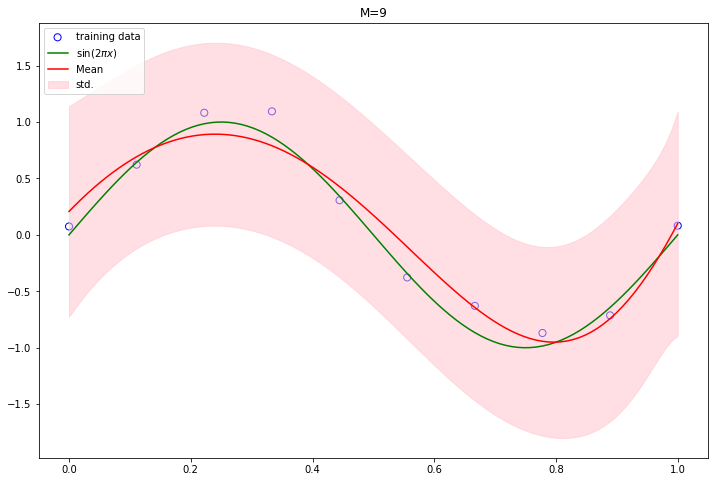

In [9]:
model = BayesianRegressor(alpha=2e-3, beta=2)
y_train = y_train.reshape(10)
model.fit(X_train, y_train)
y, y_std = model.predict(X_test)
fig = plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="Mean")
plt.fill_between(*x_test.T, y - y_std, y + y_std, color="pink", label="std.", alpha=0.5)
plt.title("M=9")
plt.legend(loc=2)
plt.show()

In [7]:
print(*x_test.T)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898